In [1]:
from pathlib import Path
import os

In [10]:
from tqdm import tqdm
import numpy as np

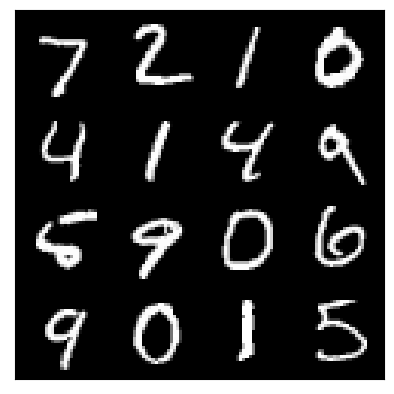

In [22]:
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
trsfm = transforms.Compose([
    transforms.ToTensor(),
])
dataset = datasets.MNIST("./data/", train=False, download=True, transform=trsfm)
plt.figure("MNISI")
data_loader = DataLoader(dataset, batch_size=16)
for data, label in data_loader:
    imgs = make_grid(data, nrow=4)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(transforms.ToPILImage()(imgs))
    break

In [1]:
from model.model import MnistModel, AutoEncoder
from torchstat import stat
import torch 
from data_loader.data_loaders import MnistDataLoader
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchvision.utils import make_grid
%matplotlib inline

In [2]:
net = AutoEncoder()
data_loader = MnistDataLoader('./data/', 16, shuffle=False, validation_split=0.1, training=False, num_workers=2)

In [3]:
ck_p = torch.load("./saved/models/Mnist_FC/1215_150413/best_model_epoch100.pth")

In [ ]:
net.load_state_dict(ck_p['state_dict'])
device = torch.device('cuda:0')
net.to(device)
net.eval()

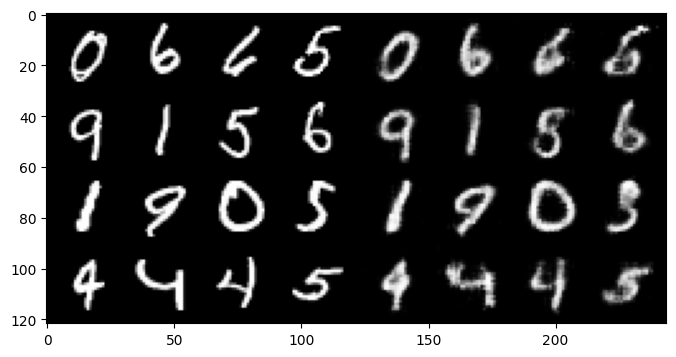

In [5]:
plt.figure(figsize=(8, 8))
cnt = 0
with torch.no_grad():
    for i, (data, target) in enumerate(data_loader):
        data, target = data.to(device), target.to(device)
        _, output = net(data)
        pred_imgs = make_grid(output, nrow=4, normalize=True)
        target_imgs = make_grid(data, nrow=4, normalize=True)
        show_imgs = torch.cat([target_imgs, pred_imgs], dim=-1)
        # print(show_imgs.shape)
        # break
        # plt.subplot(1, 2, 1)
        # plt.imshow(transforms.ToPILImage()(pred_imgs))
        # plt.subplot(1, 2, 2)
        # plt.imshow(transforms.ToPILImage()(target_imgs))
        plt.imshow(transforms.ToPILImage()(show_imgs))
        break